##1.(a)

For each cluster $C_j$, $m_j=\frac{1}{|C_j|}\sum_{x\in C_j}x$, we have:
\begin{equation}
\begin{split}
 \frac{1}{|C_j|}\sum_{x\in C_j}\sum_{x'\in C_j}d(x,x')^2&=\frac{1}{|C_j|}\sum_{x\in C_j}\sum_{x'\in C_j}||x-x'||^2\\
 &=\frac{1}{|C_j|}\sum_{x\in C_j}\sum_{x'\in C_j}(||x||^2-2x^Tx'+||x'||^2)\\
 &=2\sum_{x\in C_j}||x||^2-\frac{2}{|C_j|}(\sum_{x\in C_j}x)^T\sum_{x\in C_j}x\\
 &=2\sum_{x\in C_j}||x||^2-2|C_j|||m_j||^2\\
 &=2(\sum_{x\in C_j}||x||^2-|C_j|||m_j||^2)\\
 &=2(\sum_{x\in C_j}||x-m_j||^2)\\
 &=2(\sum_{x\in C_j}d(x,m_j)^2)
\end{split}
\end{equation}
This is true for $j=1,2,\cdots,k$. Therefore, we have:
$$2\sum_{j=1}^k\sum_{x\in C_j}d(x,m_j)^2=\sum_{j=1}^k\frac{1}{|C_j|}\sum_{x\in C_j}\sum_{x'\in C_j}d(x,x')^2$$
i.e. $J_{IC}=2J_{avg^2}$

##1.(b)

1.For each datapoint i, $d(x_i,m_{\gamma_i})\leq d(x_i,m_j)$ for any $j=1,2,\cdots,k$,by definitation of:$\gamma_i=argmin_{j\in \{1,2,\cdots,k\}}d(x_i,m_j)$.
Thus, this step minimizes $J_{avg^2}$ as function of $\gamma_1,\cdots,\gamma_n$, while hoding $m_1,\cdots,m_k$ constant

2.
\begin{equation}
\begin{split}
\sum_{x\in C_j}d(x,m_j)^2&=\sum_{x\in C_j}||x||^2-2x^Tm_j+||m_j||^2\\
&=|C_j|\ ||m_j-\frac{1}{|C_j|}\sum_{x\in C_j}x||^2+\sum_{x\in C_j}||x||^2-|C_j|\ ||\frac{1}{|C_j|}\sum_{x\in C_j}x||^2\\
&\leq \sum_{x\in C_j}||x||^2-|C_j|\ ||\frac{1}{|C_j|}\sum_{x\in C_j}x||^2
\end{split}
\end{equation}
This takes '=' when $$m_j=\frac{1}{|C_j|}\sum_{x\in C_j}x$$
Therefore, for each $C_j$, $\sum_{x\in C_j}d(x,m_j)^2$ is minimized when $m_j=\frac{1}{|C_j|}\sum_{x\in C_j}x$. So this step minimizes $J_{avg^2}$ as a function of $m_1,\cdots,m_k$, while holding $\gamma_1,\cdots,\gamma_n$ constant.

##1.(c)

As (b) proves, for every iteration, we implement two steps.
After first step, we have
$$J_{avg^2}(\gamma_1^{new},\cdots,\gamma_n^{new},m_1,\cdots,m_k)\leq J_{avg^2}(\gamma_1,\cdots,\gamma_n,m_1,\cdots,m_k)$$
After second step, we have $$J_{avg^2}(\gamma_1^{new},\cdots,\gamma_n^{new},m_1^{new},\cdots,m_k^{new})\leq J_{avg^2}(\gamma_1^{new},\cdots,\gamma_n^{new},m_1,\cdots,m_k)$$
Thus, $$J_{avg^2}(\gamma_1^{new},\cdots,\gamma_n^{new},m_1^{new},\cdots,m_k^{new})\leq J_{avg^2}(\gamma_1,\cdots,\gamma_n,m_1,\cdots,m_k)$$
So, this distortion decreases monotonically iteration by iteration

##1.(d)

one upper bound is $\frac{k^n}{k!}$ since there at most $\frac{k^n}{k!}$ states for all data points.

##2.(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# open toydata file
file=open("toydata.txt",'r')
# store data in a 500*2 array
X=np.matrix(np.zeros((500,2),dtype="float"))
k=0
for line in file.readlines():
    X[k,]=line.split()
    k=k+1
#close the file
file.close()

# randomly initialize the k centroids
def initialize(X,k):
    nsample=X.shape[0]
    return X[np.random.choice(nsample,k),]

#find the closest center for given points:
def closestcenter(X,centroid):
    n=X.shape[0]
    newlabel=np.zeros(n,dtype='int')
    for k in range(n):
        temp=centroid-X[k,]
        distance=np.sum(np.multiply(temp,temp),1)
        newlabel[k]=np.argmin(distance)
    return newlabel

#compute the new centroids
def newcenter(X,K,label):
    nsample=X.shape[0]
    ndim=X.shape[1]
    newcentroid=np.zeros((K,ndim))
    for l in range(K):
        ind=np.where(label==l)[0]
        if len(ind)==0:
            j=np.random.randint(nsample)
            newcentroid[l]=X[j,:]
        else:
            newcentroid[l]=np.mean(X[ind,],0)
    return newcentroid

#compute the distortion function
def distortion(X,centroid,label):
    nsample=X.shape[0]
    ditor=np.zeros(nsample)
    for l in range(nsample):
        temp=X[l,]-centroid[label[l],]
        ditor[l]=np.sum(np.multiply(temp,temp))
    return np.sum(ditor)

#k-means algorithm
def k_means(X,k):
    nsample=X.shape[0]
    distor=[]
    iteration=0
    max_iter=200
    difference=1
    labels=[]
    
    #intialize the centroids
    centroid=initialize(X,k)
    
    while abs(difference)>0 and iteration<max_iter:
        iteration+=1
        
        #update each point's cluster and centroid
        label=closestcenter(X,centroid)
        centroid=newcenter(X,k,label)
        
        #compute distortion and store it
        distor.append(distortion(X,centroid,label))
        labels.append(label)
        
        #compute the convergence condition
        if iteration>2:
            difference=sum(labels[-1]!=labels[-2])/nsample
    
    return [label,iteration,distor]

Text(0.5,1,'k-means clustering')

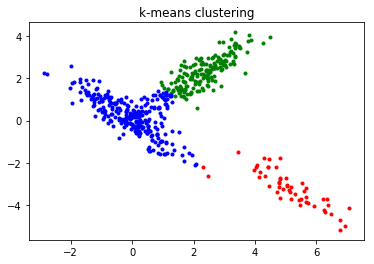

In [5]:
k=3
[label,num,distor]=k_means(X,k)
l1=plt.plot(X[label==0,0],X[label==0,1],'r.')
l2=plt.plot(X[label==1,0],X[label==1,1],'g.')
l3=plt.plot(X[label==2,0],X[label==2,1],'b.')
plt.title("k-means clustering")

Text(0,0.5,'value of distortion')

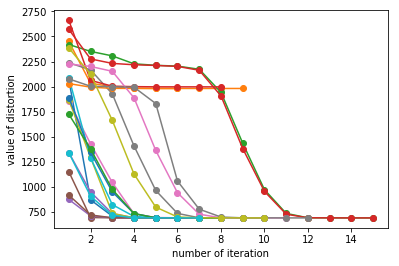

In [6]:
for j in range(20):
    [label,num,distor]=k_means(X,k)
    plt.plot(range(1,num+1),distor,'o-')
plt.xlabel("number of iteration")
plt.ylabel("value of distortion")

As we can see, there are several times when the algorithm does not correctly identify the three clusters. Most of time, it achieves the convergence condition before 8 iteration. Also, there are several runs that takes more than 10 iteratoin. The largest number of iteration in this plot is larger than 14. Therefore, we can conclude that the number of iteration mainly depends on the initialization of centroids.

##(b)

In [7]:
#define new initializing function for k-means++

#compute the corresponding probability
def prob(X,exist_centroid):
    nsample=X.shape[0]
    p=np.zeros(nsample)
    for k in range(nsample):
        temp=exist_centroid-X[k,]
        distance=np.sum(np.multiply(temp,temp),1)
        p[k]=min(distance)
    p=p/np.sum(p)
    return p

#new initialization function
def newinitialize(X,k):
    nsample=X.shape[0]
    ndim=X.shape[1]
    centroid=np.zeros((k,ndim))
    centroid[0,]=X[np.random.choice(nsample,1),]
    p=np.zeros(nsample)
    for i in range(1,k):
        p=prob(X,centroid[:i,])
        centroid[i,]=X[np.random.choice(nsample,1,p=p),]
    return centroid

# kmeans++
def k_meansplus(X,k):
    nsample=X.shape[0]
    distor=[]
    labels=[]
    iteration=0
    max_iter=200
    difference=-1
    
    #intialize the centroids
    centroid=newinitialize(X,k)
    
    while abs(difference)>0 and iteration<max_iter:
        iteration+=1
        
        #update each point's cluster and centroid
        label=closestcenter(X,centroid)
        centroid=newcenter(X,k,label)
        labels.append(label)
        
        #compute the distortion and store it
        distor.append(distortion(X,centroid,label))
        
        #compute the convergence condition
        if iteration>2:
            difference=sum(labels[-1]!=labels[-2])/nsample
    
    return [label,iteration,distor]

Text(0,0.5,'value of distortion')

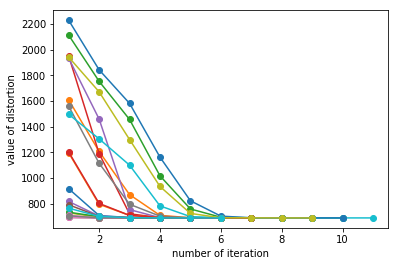

In [11]:
for j in range(20):
    [label,num,distor]=k_meansplus(X,k)
    plt.plot(range(1,num+1),distor,'o-')
plt.xlabel("number of iteration")
plt.ylabel("value of distortion")

Compared to the plot of k-means algorithm, the k-means++ costs fewer number of iteration. As we can see, most of runs convergence before 6 iteration. The largest number of iteration in this plot is relatively smaller than that of k-means algorithm. This implies that k-means++ algorithm convergences faster than k-means algorithm on average
although these two methods does not differ much for this toy dataset.

##3.(a)

\begin{equation}
\begin{split}
l(\theta)&=\sum_{i=1}^nlog(P(x_i,z_i))\\
&=\sum_{i=1}^nlog\pi_{z_i}N(x_i;\mu_{z_i},\Sigma_{z_i})\\
&=\sum_{i=1}^nlog\pi_{z_i}(2\pi)^{-\frac{d}{2}}|\Sigma_{z_i}|^{-\frac{1}{2}}exp(-(x_i-u_{z_i})^T\Sigma_{z_i}^{-1}(x_i-u_{z_i})/2)\\
&=\sum_{i=1}^nlog\pi_{z_i}-\frac{1}{2}\sum_{i=1}^nlog|\Sigma_{z_i}|-\frac{1}{2}\sum_{i=1}^n(x_i-u_{z_i})^T\Sigma_{z_i}^{-1}(x_i-u_{z_i})-\frac{nd}{2}log2\pi
\end{split}
\end{equation}

##3.(b)

\begin{equation}
\begin{split}
P_{ij}&=P(z_i=j|x_i)\\
&=\frac{P(x_i|z_i=j)P(z_i=j)}{\sum_{l=1}^kP(x_i|z_i=l)P(z_i=l)}\\
&=\frac{\pi_jN(x_i;\mu_j,\Sigma_j)}{\sum_{l=1}^k\pi_lN(x_i;\mu_l,\Sigma_l)}\\
&=\frac{\pi_j(2\pi)^{-\frac{d}{2}}|\Sigma_{j}|^{-\frac{1}{2}}exp(-(x_i-u_{j})^T\Sigma_{j}^{-1}(x_i-u_{j})/2)}{\sum_{l=1}^k\pi_l(2\pi)^{-\frac{d}{2}}|\Sigma_{l}|^{-\frac{1}{2}}exp(-(x_i-u_{l})^T\Sigma_{l}^{-1}(x_i-u_{l})/2)}
\end{split}
\end{equation}

##3.(c)

\begin{equation}
\begin{split}
\bar{l}_{\theta_{old}}(\theta)&=E_{z|X,\theta_{old}}(l(\theta))\\
&=E_{z|X,\theta_{old}}\sum_{i=1}^nlogP(x_i,z_i)\\
&=\sum_{i=1}^nE_{z|X,\theta_{old}}logP(x_i,z_i)\\
&=\sum_{i=1}^n\sum_{j=1}^kP(z_i=j|x_i,\theta_{old})logP(x_i,z_i=j)\\
&=\sum_{i=1}^n\sum_{j=1}^kP_{ij}logP(x_i,z_i=j)\\
&=\sum_{i=1}^n\sum_{j=1}^kP_{ij}(log\pi_j-\frac{1}{2}log|\Sigma_j|-\frac{1}{2}(x_i-u_j)^T\Sigma_j^{-1}(x_i-u_j)-\frac{d}{2}log2\pi)
\end{split}
\end{equation}

##3.(d)

write $g=\bar{l}_{\theta_{old}}(\theta)+\lambda(\sum_{j=1}^k\pi_j-1)$. Take derivative on g w.r.t $\pi_j$ and $\lambda$, we have:
$$\frac{\partial g}{\partial \pi_j}=\frac{1}{\pi_j}\sum_{i=1}^nP_{ij}+\lambda,\ j=1,2,\cdots,k$$
$$\frac{\partial g}{\partial \lambda}=\sum_{j=1}^k\pi_j-1$$
Combine above equations, we can get:
$$\hat{\pi_j}=\frac{1}{n}\sum_{i=1}^nP_{ij}$$

##3.(e)

$$(\mu_l,\Sigma_l)=argmax_{\mu_l,\Sigma_l}\sum_{i=1}^nP_{il}(-\frac{1}{2}log|\Sigma_l|-\frac{1}{2}(x_i-\mu_l)^T\Sigma_l^{-1}(x_i-\mu_l))$$
Let $$f=\sum_{i=1}^nP_{il}(-\frac{1}{2}log|\Sigma_l|-\frac{1}{2}(x_i-\mu_l)^T\Sigma_l^{-1}(x_i-\mu_l))$$
$$\frac{\partial f}{\partial \mu_l}=-\sum_{i=1}^nP_{il}(\Sigma_l^{-1}\mu_l-\Sigma_l^{-1}x_i)=0$$
We can get
$$\hat{\mu_l}=\frac{\sum_{i=1}^nP_{il}x_i}{\sum_{i=1}^nP_{il}},\ l=1,2,\cdots,k$$
denote
$$A=\sum_{i=1}^nP_{il}(x_i-\hat{\mu_i})(x_i-\hat{\mu_i})^T$$
\begin{equation}
\begin{split}
f(\hat{\mu_l},\Sigma_l)&=-\frac{\sum_{i=1}^nP_{il}}{2}(log|\Sigma_l|+tr(\Sigma_l^{-1}\frac{A}{\sum_{i=1}^nP_{il}}))\\
&=-\frac{\sum_{i=1}^nP_{il}}{2}(tr(\Sigma_l^{-1}\frac{A}{\sum_{i=1}^nP_{il}})-log(\Sigma_l^{-1}\frac{A}{\sum_{i=1}^nP_{il}})+log|\frac{A}{\sum_{i=1}^nP_{il}}|)\\
&=-\frac{\sum_{i=1}^nP_{il}}{2}(tr(\Sigma_l^{-\frac{1}{2}}\frac{A}{\sum_{i=1}^nP_{il}}\Sigma_l^{-\frac{1}{2}})-log(\Sigma_l^{-\frac{1}{2}}\frac{A}{\sum_{i=1}^nP_{il}}\Sigma_l^{-\frac{1}{2}})+log|\frac{A}{\sum_{i=1}^nP_{il}}|)
\end{split}
\end{equation}
we have 
$$tr(\Sigma_l^{-\frac{1}{2}}\frac{A}{\sum_{i=1}^nP_{il}}\Sigma_l^{-\frac{1}{2}})-log(\Sigma_l^{-\frac{1}{2}}\frac{A}{\sum_{i=1}^nP_{il}}\Sigma_l^{-\frac{1}{2}})\geq p$$
This takes '=' when
$$\Sigma_l^{-\frac{1}{2}}\frac{A}{\sum_{i=1}^nP_{il}}\Sigma_l^{-\frac{1}{2}}=I_p$$
Thus
$$\hat{\Sigma_l}=\frac{A}{\sum_{i=1}^nP_{il}}=\frac{\sum_{i=1}^nP_{il}(x_i-\hat{\mu_i})(x_i-\hat{\mu_i})^T}{\sum_{i=1}^nP_{il}},\ l=1,2,\cdots,k$$

##3.(f)

These update ruels are similar

For EM-E step, it computes the posterior probability for each data point in given cluster j, which equals to assign cluster to each data point. The first step of k-means, it computes new cluster for each data point.

For EM-M step, it computes the parameters, updates the $\pi_1,\cdots,\pi_k,\mu_1,\cdots,\mu_k,\Sigma_1,\cdots,\Sigma_k$. For second step of k-means, it computes its new centroid $m_1,\cdots,m_k$ for each cluster. They are very close.

The difference is that mixture Gaussian model here adopts the idea of Bayesian method. Each cluster has a prior probablility.

##3.(g)

In [12]:
pi=np.pi
#compute mulvariate normal density given mean and covariance matrix
def normal(x,mu,sigma):
    d=sigma.shape[0]
    pdf=np.power(2*pi,-d/2)*np.power(np.linalg.det(sigma),-0.5)*\
    np.exp(-0.5*(x-mu)*np.linalg.inv(sigma)*(x-mu).transpose())
    return pdf[0,0]

#This function generates initial Gaussian means and covariance matrixs
def EM_initial(X,num_cluster):
    #randomly choose num_cluster sample as the mean 
    nsample=X.shape[0]
    ndim=X.shape[1]
    mu=X[np.random.choice(nsample,num_cluster),:]
    #choose covariance matrix for each cluster
    sigma=[np.eye(ndim)]*num_cluster
    #initially suppose each cluster with same prior probability
    p=[1/num_cluster]*num_cluster
    return [mu,sigma,p]


#compute the posterior probability matrix for Xi from j's cluster
def proba(X,p,mu,sigma,k):
    nsample=X.shape[0]
    prob=np.zeros((nsample,k),dtype="float")
    for i in range(nsample):
        temp=np.zeros((1,k))
        for j in range(k):
            temp[0,j]=normal(X[i,],mu[j],sigma[j])
        prob[i,]=np.multiply(temp,p)
        prob[i,]=prob[i,]/np.sum(prob[i,])
    return prob


#compute the log-likelihood
def loglikelihood(X,mu,sigma,p,k):
    nsample=X.shape[0]
    E=0
    for i in range(nsample):
        temp=np.zeros((1,k))
        for j in range(k):
            temp[0,j]=normal(X[i,],mu[j],sigma[j])
        E+=np.log(np.sum(np.multiply(temp,p)))
    return E

#generate new mean and covariance matrix
def new_estimate(X,prob,k):
    nsample=X.shape[0]
    d=X.shape[1]
    #compute prior probability
    p=np.mean(prob,0)
    mu=np.zeros((k,d))
    sigma=np.zeros((k,d,d))
    #compute mu
    for i in range(k):
        mu[i]=prob.T[i,]*X/np.sum(prob.T[i,])
    #compute covariance matrix
    for i in range(k):
        newx=np.matrix(X-mu[i])
        newtemp=np.matrix(np.zeros((d,d)))
        for j in range(nsample):
            newtemp=newtemp+prob[j,i]*newx[j,].T*newx[j,]
        newtemp=newtemp/np.sum(prob.T[i,])
        sigma[i]=newtemp

    return [mu,sigma,p]

#EM algorithm
def EM(X,k,epsilon):
    max_iter=200
    loglikelihoods=[]
    iteration=0
    difference=3*epsilon
    nsample=X.shape[0]
    
    #initial mu, sigma and prior probability
    [mu,sigma,p]=EM_initial(X,k)
    
    while(difference>epsilon and iteration<max_iter):
        iteration+=1
        #E-step
        prob=proba(X,p,mu,sigma,k)
        #M-step
        [mu,sigma,p]=new_estimate(X,prob,k)
        #compute the loglikelihood
        loglikelihoods.append(loglikelihood(X,mu,sigma,p,k))
        #compute the convergence condition
        if iteration>=2:
            difference=loglikelihoods[-1]-loglikelihoods[-2]
        
    #compute the corresponding cluster for each sample data
    label=np.argmax(prob,1)
    
    return [label,iteration,mu,sigma,prob,loglikelihoods]


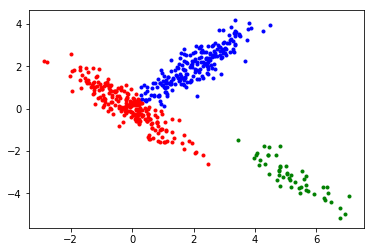

In [15]:
k=3
epsilon=0.05
[label,iteration,mu,sigma,probability,loglik]=EM(X,k,epsilon)
l1=plt.plot(X[label==0,0],X[label==0,1],'r.')
l2=plt.plot(X[label==1,0],X[label==1,1],'g.')
l3=plt.plot(X[label==2,0],X[label==2,1],'b.')

As we can see, the cluster result is little different from that in k-means. It may cluster better compared to k-means from above result, three clusters are well separated. 

In [16]:
#compute the average number of iteration for k-means
k=3
iter_num=0
for l in range(20):
    [label,iteration,distor]=k_means(X,k)
    iter_num+=iteration
iter_num=iter_num/20
print('the average number of iteration for k-means is {0:.3f}'.format(iter_num))

#compute the average number of iteration of EM algorithm
iter_num=0
epsilon=0.05
for l in range(20):
    [label,iteration,mu,sigma,probability,loglik]=EM(X,k,epsilon)
    iter_num+=iteration
iter_num=iter_num/20
print('the average number of iteration for EM is {0:.3f}'.format(iter_num))

the average number of iteration for k-means is 8.450
the average number of iteration for EM is 19.050


The above result shows that the average number of iteration for EM is larger than than of k-means. In other words, it converges slower than k-means method on average.

##4

In [17]:
#randomly generate 10 centroids uniform from square [-50,50]x[-50,50]
x=np.random.uniform(low=-50,high=50,size=10)
y=np.random.uniform(low=-50,high=50,size=10)
mean=np.zeros((10,2))
mean[:,0]=x
mean[:,1]=y

#assign each centroid with same matrix 
sigma=np.array([[1,0.2],[0.2,1]])

#uniformly generate number of data sample for each centroid in [150,250]
num=np.random.choice(np.linspace(150,250,num=101,dtype="int"),10)


x=np.random.multivariate_normal(mean[1,:],sigma,num[1])
for l in range(1,10):
    #generate data points for each centroid under normal assumption
    temp=np.random.multivariate_normal(mean[l,:],sigma,num[l])
    
    #concatenate data points
    x=np.concatenate((x,temp),axis=0)
x=np.matrix(x)

In [18]:
k=10
#compute average distortion of k-means++
Distortion=0
for l in range(20):
    [label,num,distor]=k_meansplus(x,k)
    Distortion+=distor[-1]
Distortion=Distortion/20
print('the average distortion for k-means++ is {0:.3f}'.format(Distortion))

the average distortion for k-means++ is 4088.516


In [19]:
#compute average distortion of k-means
Distortion=0
for l in range(20):
    [label,num,distor]=k_means(x,k)
    Distortion+=distor[-1]
Distortion=Distortion/20
print('the average distortion for k-means is {0:.3f}'.format(Distortion))

the average distortion for k-means is 58535.285


As we can see that k–means++ improves the performance of k–means by at least a factor of 10 in terms of the distortion function value of the final clustering.